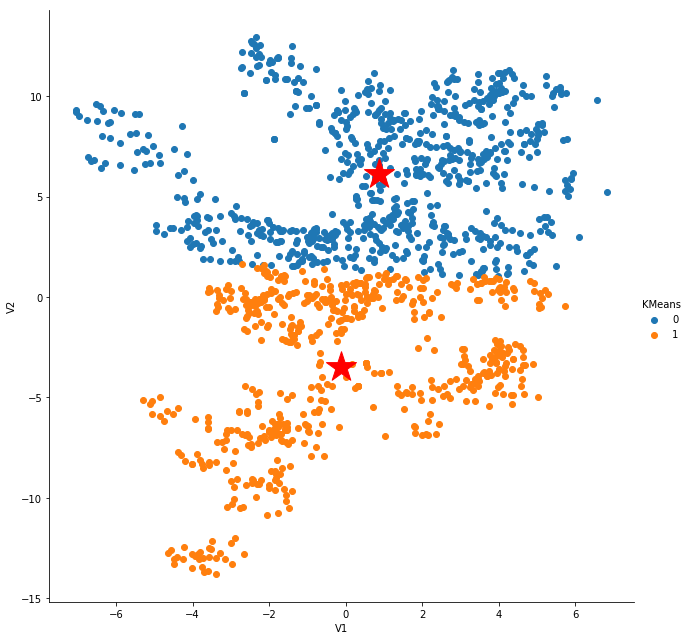

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering

data = arff.loadarff('banknote_ver.arff')
df = pd.DataFrame(data[0])
data = np.column_stack(( df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
#Assigns the values to their respective clusters
df['KMeans'] = km_res.labels_
df
#plot out the result                                     
#FacetGrid is used to plot multivariable distribution    #df = dataframe,
g = sb.FacetGrid(data = df, hue = 'KMeans', height = 9)  #height is in place of size,
                                                         #row,col,hue = variables defining the subsets of data which willl be drawn

g.map(plt.scatter, 'V1', 'V2')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=1000, marker='*', c='red')